### Author: Shah Muhammad Tiham
### Email:  tihamshah25599@gmail.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the Train set
data=pd.read_csv('../input/nslkdd/KDDTrain+.txt')

# Read the Test set
data_test=pd.read_csv('../input/nslkdd/KDDTest+.txt')

In [3]:
# Each column label
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

# Assign column labels to Train set
data.columns = columns

# Assign column labels to Test set
data_test.columns = columns

In [4]:
# Map different attack type to original four attack types.
# The original four attack types are: Dos, Probe, R2L, U2R
dict_of_attacks = {'apache2':'Dos', 'back':'Dos', 'buffer_overflow':'U2R', 'ftp_write':'R2L', 'guess_passwd':'R2L',
       'httptunnel':'R2L', 'imap':'R2L', 'ipsweep':'Probe', 'land':'Dos', 'loadmodule':'U2R', 'mailbomb':'Dos',
       'mscan':'Probe', 'multihop':'R2L', 'named':'R2L', 'neptune':'Dos', 'nmap':'Probe', 'normal':'normal', 'perl':'U2R',
       'phf':'R2L', 'pod':'Dos', 'portsweep':'Probe', 'processtable':'Dos', 'ps':'U2R', 'rootkit':'U2R',
       'saint':'Probe', 'satan':'Probe', 'sendmail':'R2L', 'smurf':'Dos', 'snmpgetattack':'R2L',
       'snmpguess':'R2L', 'spy':'R2L', 'sqlattack':'U2R', 'teardrop':'Dos', 'udpstorm':'Dos', 'warezclient':'R2L', 'warezmaster':'R2L',
       'worm':'Dos', 'xlock':'R2L', 'xsnoop':'R2L', 'xterm':'U2R'}

# Map attack types in Train set
for i in range(len(data['attack'])):
    data['attack'][i] = dict_of_attacks[data['attack'][i]]

# Map attack types in Test set
for i in range(len(data_test['attack'])):
    data_test['attack'][i] = dict_of_attacks[data_test['attack'][i]]

In [5]:
# Label encode categorical values to numerical values
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])

data['attack']=le.fit_transform(data['attack'])

data_test['protocol_type']=le.fit_transform(data_test['protocol_type'])
data_test['service']=le.fit_transform(data_test['service'])
data_test['flag']=le.fit_transform(data_test['flag'])

data_test['attack']=le.fit_transform(data_test['attack'])

In [6]:
# Scale values using min-max scaler
scaler = MinMaxScaler()

# Split feature and class label of Train set
x = data.drop(['attack'], axis=1).values
y = data['attack'].values

# Scale Train set
x = scaler.fit_transform(x)

# Split feature and class label of Test set
xl_test = data_test.drop(['attack'], axis=1).values
yl_test = data_test['attack'].values

# Scale Test set
xl_test = scaler.fit_transform(xl_test)

In [7]:
# K-fold cross validation funciton
# K = 10

# Input parameters:
#     x_train: Training features
#     y_train: Training class labels
#     model: Trained model

# Return Value:
#     Mean accuracy
def cross_val(x_train, y_train, model):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv=10)
    return accuracies.mean()

In [8]:
# Function to train the model

# Input parameters:
#     x_train: Training features
#     y_train: Training class labels
#     model: Trained model

# Return Value:
#     Mean accuracy of 10 fold cross validation
def fit_and_evaluate(model, x_train, y_train):
    model.fit(x_train, y_train)
    
    model_cross = cross_val(x_train, y_train, model)
    
    return model_cross

In [9]:
# Function to evaluate the trained model

# Input parameters:
#     x_test: Test features
#     y_test: Test class labels
#     model: Trained model
def run_experiment(model, x_test , y_test):
    y_pred = model.predict(x_test)
    report=classification_report(y_test,y_pred)
    print(report)
    cm_xl=confusion_matrix(y_test,y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_xl)
    disp.plot()
    plt.show()

In [10]:
# Logistic Regression model
logr = LogisticRegression()

# Train the model using Train set
logr_cross = fit_and_evaluate(logr, np.copy(x), np.copy(y))

# Mean Accuracy
print('10 Fold Cross Validation Score = %0.4f' % logr_cross)

10 Fold Cross Validation Score = 0.9769


              precision    recall  f1-score   support

           0       0.95      0.86      0.91      7459
           1       0.65      0.90      0.76      2421
           2       0.95      0.12      0.21      2885
           3       0.64      0.37      0.47        67
           4       0.78      0.96      0.86      9711

    accuracy                           0.81     22543
   macro avg       0.79      0.64      0.64     22543
weighted avg       0.84      0.81      0.78     22543



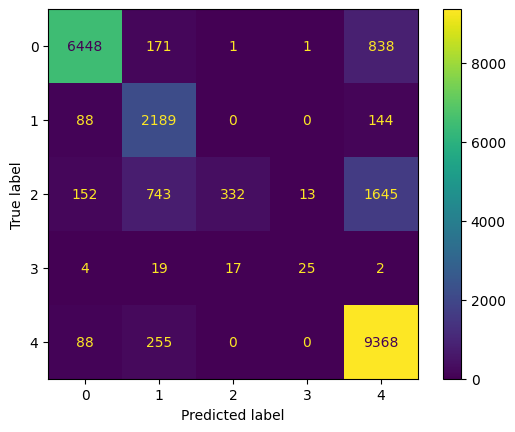

In [11]:
# Evaluate the trained model using Test set
run_experiment(logr, np.copy(xl_test), np.copy(yl_test))